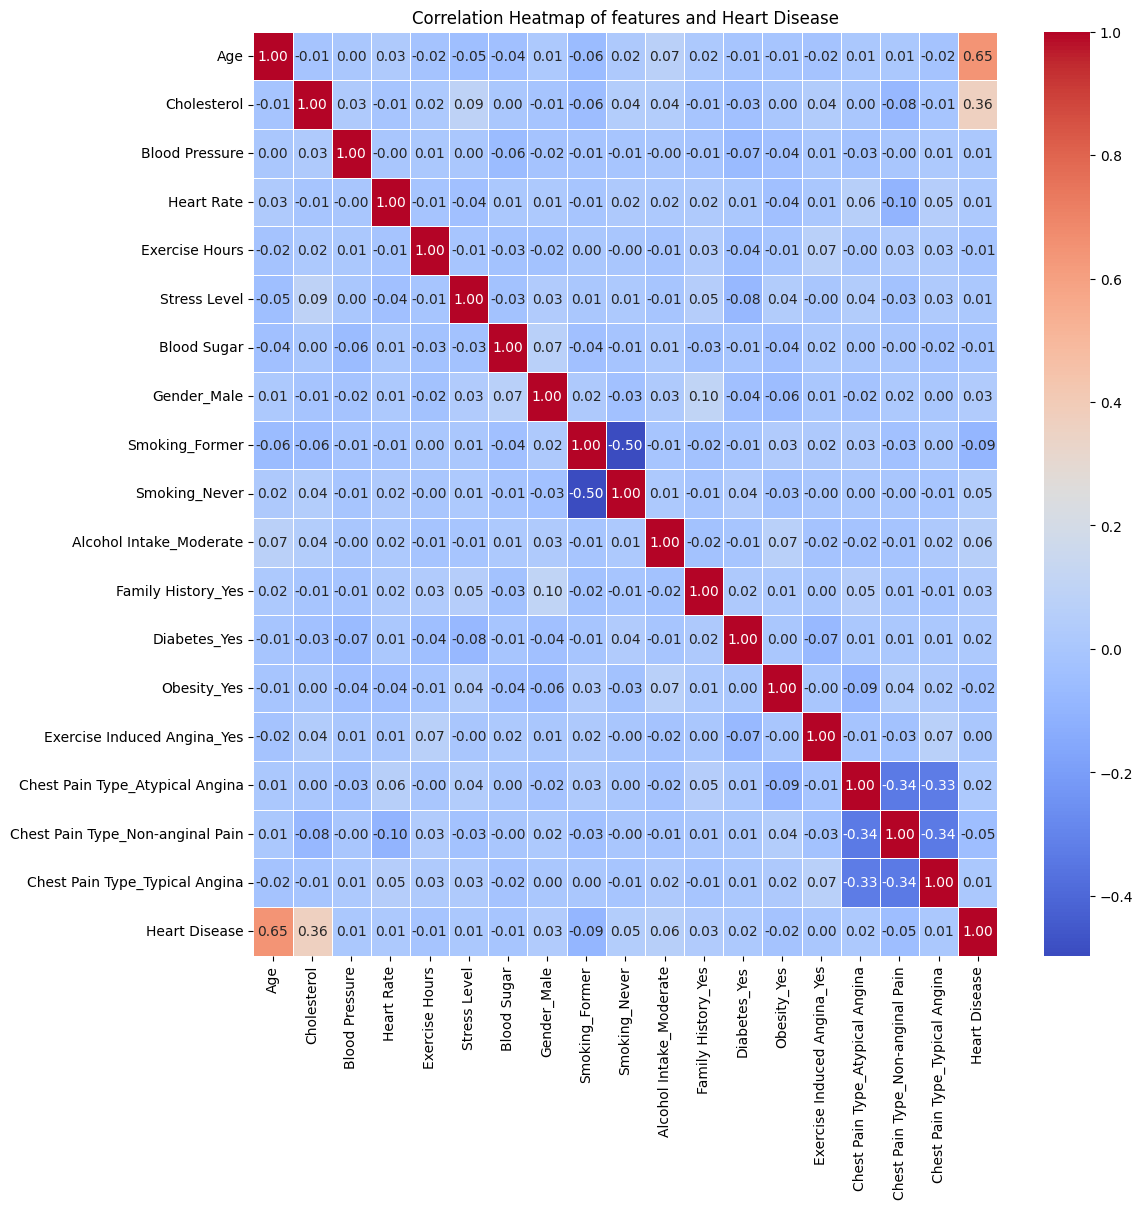

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#MULTIVARIABLE ANALYSIS 
# Load the dataset
df = pd.read_csv("../data/processed/standardized_data.csv")

#Add Heart disease as the target variable, to see its correlation with other values 
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_with_target = X.copy()
X_with_target['Heart Disease'] = y

#Correlation matrix
correlation_matrix = X_with_target.corr()

#create the heatmap of the matrix 
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of features and Heart Disease")
plt.show()


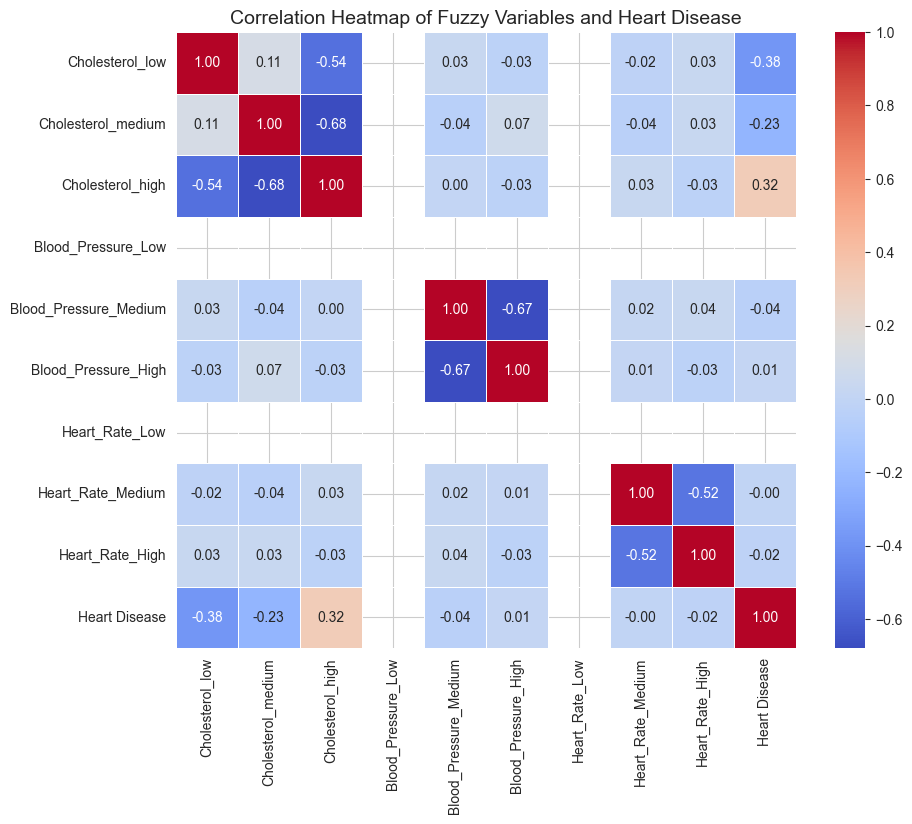

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with fuzzy values
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Select only the fuzzy membership values and the heart disease column
correlation_data = df[['Cholesterol_low', 'Cholesterol_medium', 'Cholesterol_high',
                       'Blood_Pressure_Low', 'Blood_Pressure_Medium', 'Blood_Pressure_High',
                       'Heart_Rate_Low', 'Heart_Rate_Medium', 'Heart_Rate_High',
                       'Heart Disease']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize title
plt.title("Correlation Heatmap of Fuzzy Variables and Heart Disease", fontsize=14)

# Show the plot
plt.show()


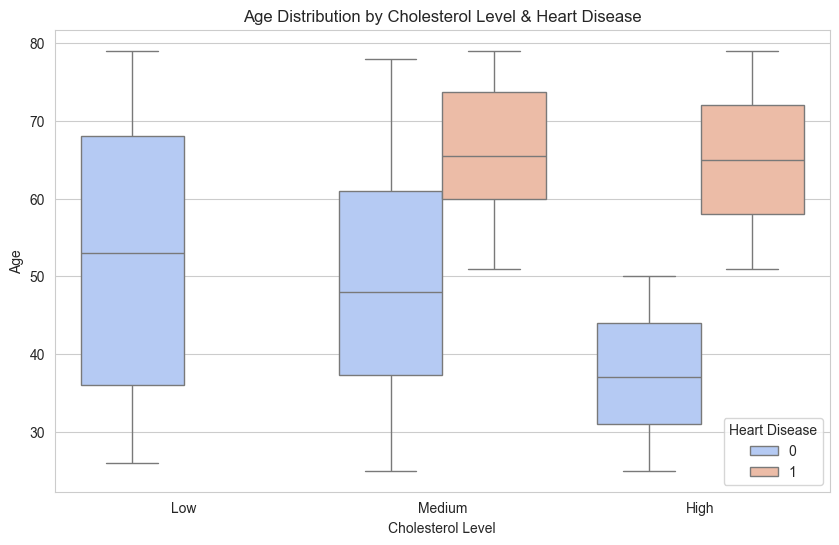

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Create Cholesterol_Level column based on max membership
df['Cholesterol_Level'] = df[['Cholesterol_low', 'Cholesterol_medium', 'Cholesterol_high']].idxmax(axis=1)
df['Cholesterol_Level'] = df['Cholesterol_Level'].replace({
    'Cholesterol_low': 'Low',
    'Cholesterol_medium': 'Medium',
    'Cholesterol_high': 'High'
})

# Define custom order
cholesterol_order = ["Low", "Medium", "High"]

# Plot boxplot with custom order
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cholesterol_Level", y="Age", hue="Heart Disease", data=df, 
            order=cholesterol_order, palette="coolwarm")

# Customize plot
plt.title("Age Distribution by Cholesterol Level & Heart Disease")
plt.xlabel("Cholesterol Level")
plt.ylabel("Age")
plt.legend(title="Heart Disease")
plt.show()


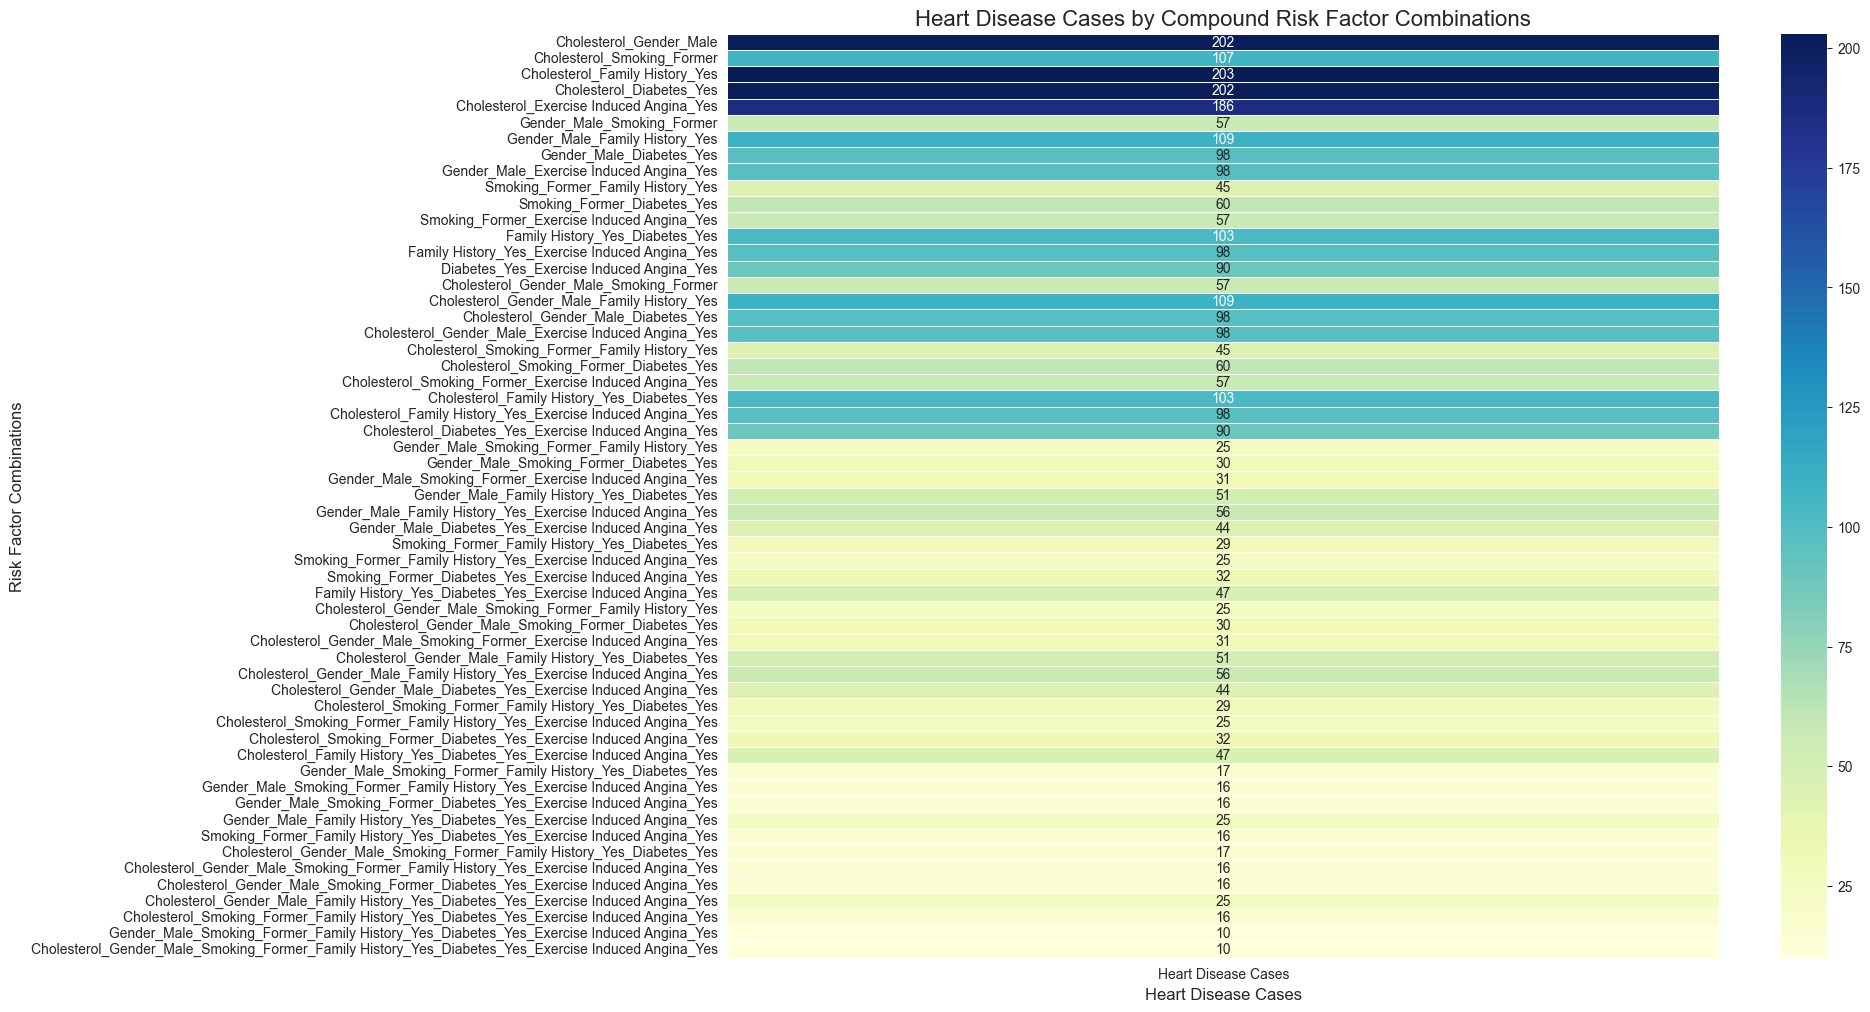

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Load dataset
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Define the main factors
main_factors = [
    "Cholesterol",
    "Gender_Male",
    "Smoking_Former",
    "Family History_Yes",
    "Diabetes_Yes",
    "Exercise Induced Angina_Yes"
]

# Generate all possible combinations of the main factors
combinations_list = []
for r in range(2, len(main_factors) + 1):  # Start from 2 factors up to all factors
    combinations_list.extend(combinations(main_factors, r))

# Create boolean columns for each combination
for combo in combinations_list:
    combo_name = "_".join(combo)
    df[combo_name] = df[list(combo)].all(axis=1)

# Create a new DataFrame to store heart disease cases
heart_disease_data = pd.DataFrame()

# Count heart disease cases for each combination
for combo in combinations_list:
    combo_name = "_".join(combo)
    heart_disease_data[combo_name] = [df.loc[df[combo_name], "Heart Disease"].sum()]

# Transpose the DataFrame for heatmap plotting
heart_disease_data = heart_disease_data.T
heart_disease_data.columns = ["Heart Disease Cases"]

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heart_disease_data, annot=True, cmap="YlGnBu", cbar=True, fmt="g", linewidths=0.5)

# Customize plot
plt.title("Heart Disease Cases by Compound Risk Factor Combinations", fontsize=16)
plt.xlabel("Heart Disease Cases", fontsize=12)
plt.ylabel("Risk Factor Combinations", fontsize=12)
plt.show()

C:\Users\emili\AppData\Local\Temp\ipykernel_29808\193694849.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chest_pain_df, x="Chest Pain Type", y="Positive Cases", palette="viridis")


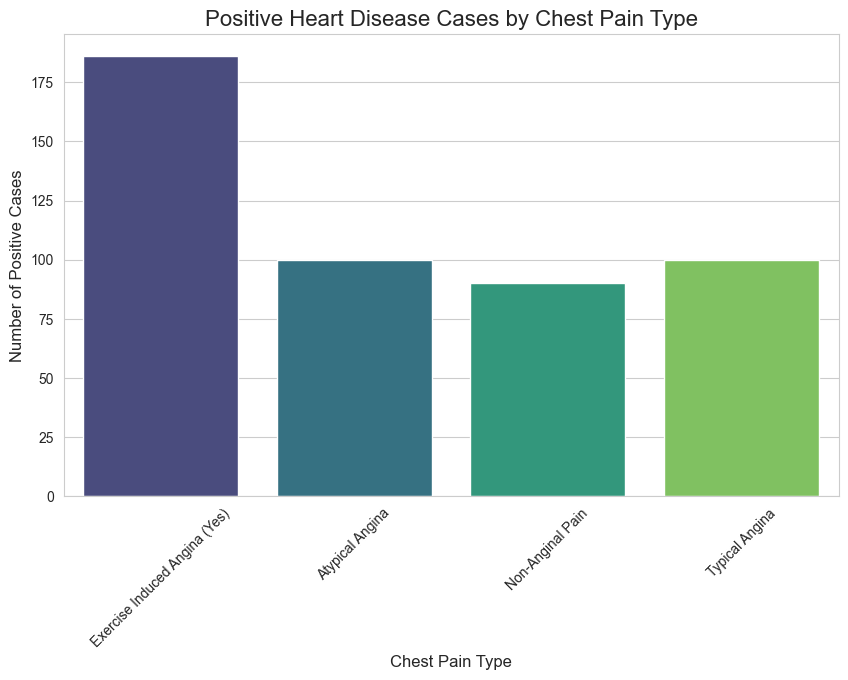

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Sum positive heart disease cases for each chest pain type
chest_pain_counts = {
    "Exercise Induced Angina (Yes)": df.loc[df["Exercise Induced Angina_Yes"] == True, "Heart Disease"].sum(),
    "Atypical Angina": df.loc[df["Chest Pain Type_Atypical Angina"] == True, "Heart Disease"].sum(),
    "Non-Anginal Pain": df.loc[df["Chest Pain Type_Non-anginal Pain"] == True, "Heart Disease"].sum(),
    "Typical Angina": df.loc[df["Chest Pain Type_Typical Angina"] == True, "Heart Disease"].sum()
}

# Convert to DataFrame for visualization
chest_pain_df = pd.DataFrame(list(chest_pain_counts.items()), columns=["Chest Pain Type", "Positive Cases"])

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chest_pain_df, x="Chest Pain Type", y="Positive Cases", palette="viridis")
plt.title("Positive Heart Disease Cases by Chest Pain Type", fontsize=16)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Number of Positive Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Heatmap Data Preparation
heatmap_data = pd.DataFrame({
    "Chest Pain Type": ["Exercise Induced Angina (Yes)", "Atypical Angina", "Non-Anginal Pain", "Typical Angina"],
    "Positive Cases": [chest_pain_counts["Exercise Induced Angina (Yes)"],
                       chest_pain_counts["Atypical Angina"],
                       chest_pain_counts["Non-Anginal Pain"],
                       chest_pain_counts["Typical Angina"]]
}).set_index("Chest Pain Type")
